# False clouds in ABI static features

Clouds that do not move or evolve are more likely to be false clouds. This program overlays ABI imagery in order to see which features do not evolve with time. 

ABI data is from /mnt/grb/goes16/ on smiller2

In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from sklearn.preprocessing import normalize
import fnmatch
import pickle
import timeit

In [2]:
#--- Filter to the region

#---Georges Bank
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 42.5

## Visualizing a specific time

In [3]:
nlct_path = "/home/jturner/false_low_clouds_2023/Nighttime_Low_Cloud_Test/data/"

filename = 'goes_e_ntlc_2022_09_14_01H_40M'

In [4]:
file = open(nlct_path+filename, 'rb')
BTD = pickle.load(file)
file.close()

Filter the NLCT to the region of interest:

In [5]:
BTD_c = BTD.where((BTD.lat>min_lat) & (BTD.lat<max_lat) & (BTD.lon>min_lon) & (BTD.lon<max_lon))
BTD_c = BTD_c.dropna(dim="y", how="all")
BTD_c = BTD_c.dropna(dim="x", how="all")

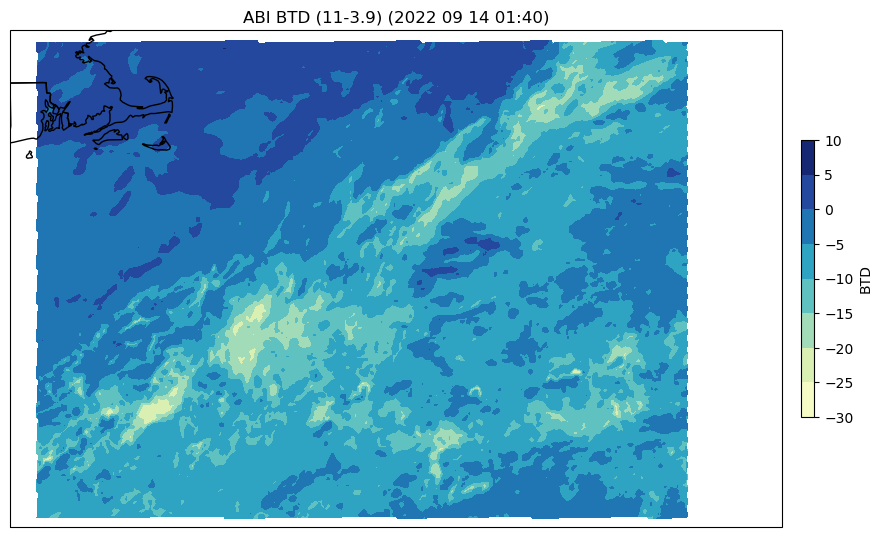

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.YlGnBu
#levels = np.linspace(0, np.amax(BTD), 31)

c=ax.contourf(BTD_c.lon, BTD_c.lat, BTD_c[0], cmap=cmap) #levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('ABI BTD (11-3.9) (2022 09 14 01:40)')
clb.set_label('BTD')

ax.add_feature(cfeature.STATES)

## Combining the range of times

In [14]:
#--- Initialize an array of 1's in the shape of the final image
BTD_prod = [ [1]*len(BTD_c[0][0]) for i in range(len(BTD_c[0]))]

#--- Starting the timer
starttime = timeit.default_timer()

for filename in os.listdir(nlct_path):
        print(filename)
        
        #--- Open the NLCT file
        file = open(nlct_path+filename, 'rb')
        BTD = pickle.load(file)
        file.close()
        
        #--- Crop to the specified region
        BTD = BTD.where((BTD.lat>min_lat) & (BTD.lat<max_lat) & (BTD.lon>min_lon) & (BTD.lon<max_lon))
        BTD = BTD.dropna(dim="y", how="all")
        BTD = BTD.dropna(dim="x", how="all")
        
        #--- Set negative values to zero
        BTD = np.where(BTD < 0, 0, BTD)
        
        #--- Multiply to only enhance static clouds
        BTD_prod = BTD_prod*BTD
        
        #--- Limit runaway large values to 3
        BTD_prod = np.where(BTD_prod > 3, 3, BTD_prod)
        
print("Completed: ", timeit.default_timer() - starttime)

goes_e_ntlc_2022_09_14_01H_40M
goes_e_ntlc_2022_09_14_00H_20M
goes_e_ntlc_2022_09_14_01H_20M
goes_e_ntlc_2022_09_14_03H_40M
goes_e_ntlc_2022_09_14_02H_00M
goes_e_ntlc_2022_09_14_03H_30M
goes_e_ntlc_2022_09_14_02H_30M
goes_e_ntlc_2022_09_14_03H_20M
goes_e_ntlc_2022_09_14_03H_00M
goes_e_ntlc_2022_09_14_02H_20M
goes_e_ntlc_2022_09_14_03H_50M
goes_e_ntlc_2022_09_14_00H_10M
goes_e_ntlc_2022_09_14_00H_40M
goes_e_ntlc_2022_09_14_02H_10M
goes_e_ntlc_2022_09_14_02H_50M
goes_e_ntlc_2022_09_14_01H_50M
goes_e_ntlc_2022_09_14_00H_30M
goes_e_ntlc_2022_09_14_01H_10M
goes_e_ntlc_2022_09_14_02H_40M
goes_e_ntlc_2022_09_14_03H_10M
goes_e_ntlc_2022_09_14_00H_00M
goes_e_ntlc_2022_09_14_00H_50M
goes_e_ntlc_2022_09_14_01H_00M
goes_e_ntlc_2022_09_14_01H_30M
Completed:  33.41785419546068


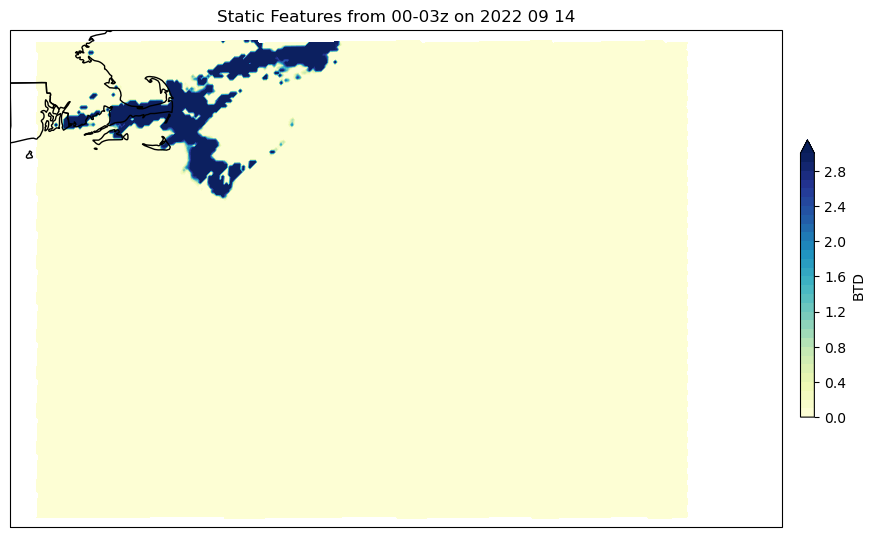

In [21]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.YlGnBu
levels = np.linspace(0, 3, 31)

c=ax.contourf(BTD_c.lon, BTD_c.lat, BTD_prod[0], cmap=cmap, levels=levels, extend='max')
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Static Features from 00-03z on 2022 09 14')
clb.set_label('BTD')

ax.add_feature(cfeature.STATES)